In [1]:
import kagglehub
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

Using Colab cache for faster access to the 'telco-customer-churn' dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#**Data Understanding**

---




In [3]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [9]:
# Numerical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')
Categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


#**Exploratory Data Analysis (EDA)**
---







### (1) Univariate Analysis



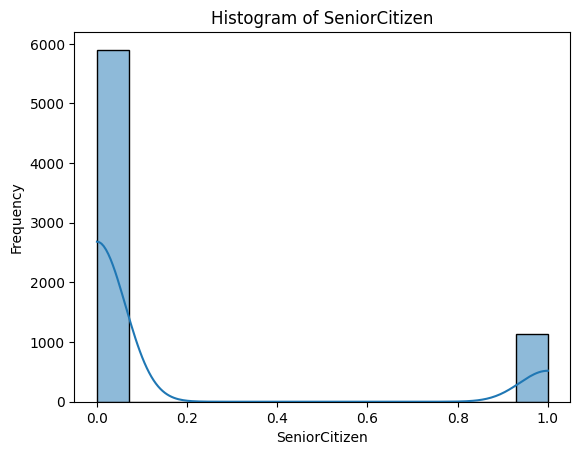

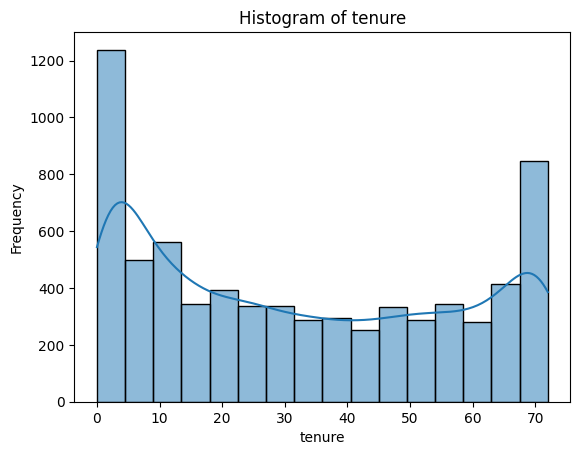

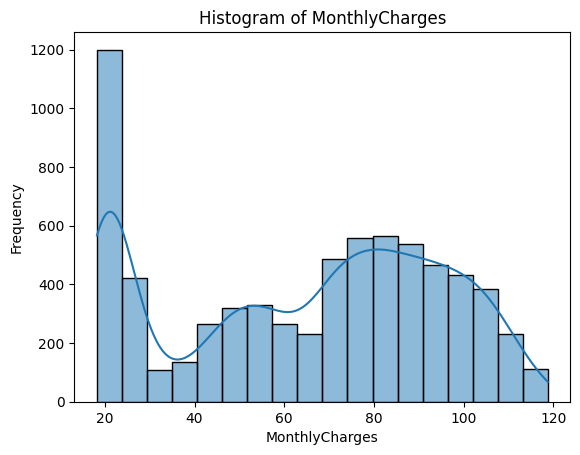

In [10]:
# -------- HISTOGRAMS --------
for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges']:
    plt.figure()
    sns.histplot(df[col],kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

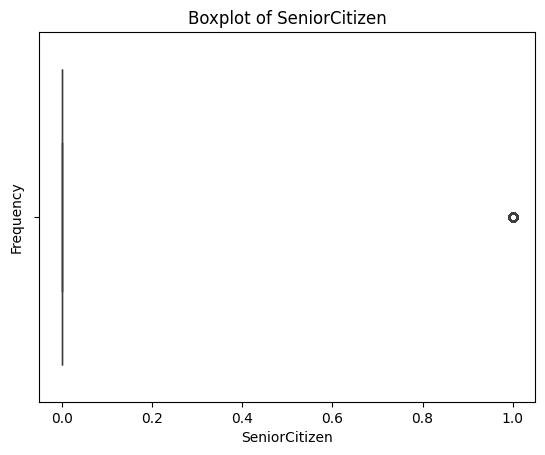

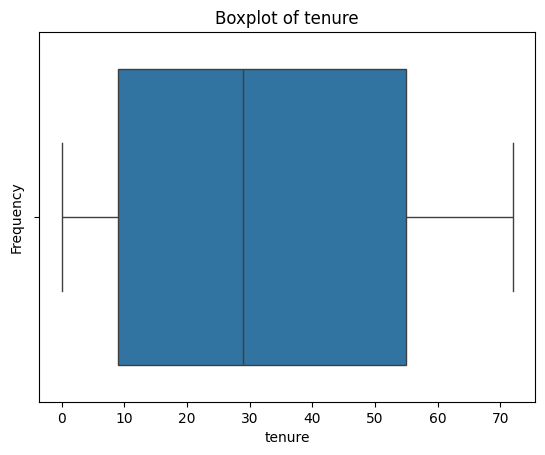

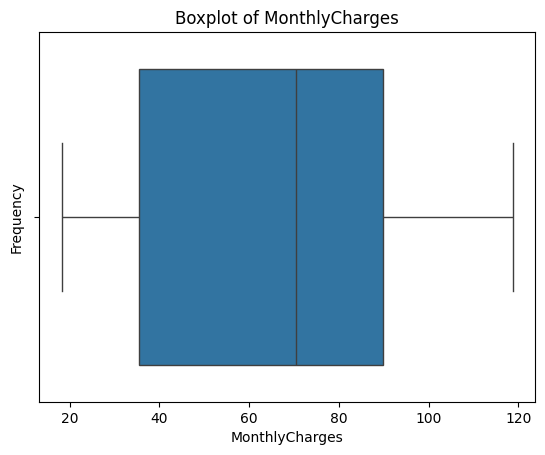

In [11]:
# -------- BOXPLOTS --------
for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges']:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### (2) Bivariate Analysis

<Axes: >

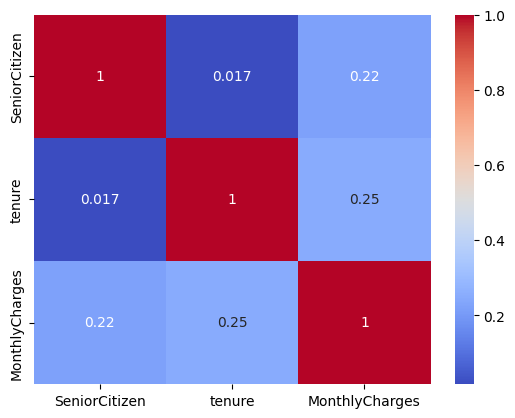

In [12]:
corr = df[['SeniorCitizen', 'tenure', 'MonthlyCharges']].corr()
sns.heatmap(corr,cmap="coolwarm", annot=True)

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

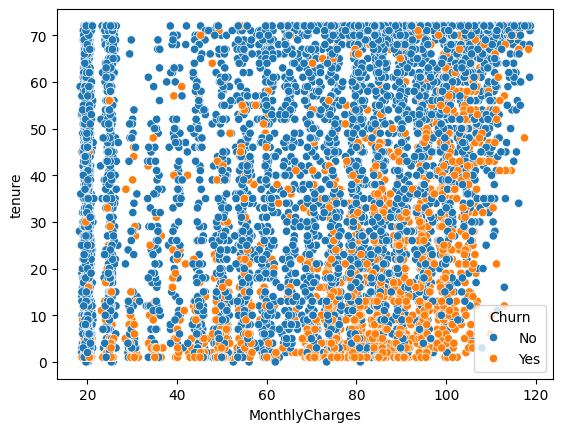

In [13]:
# MonthlyCharges vs Churn
sns.scatterplot( x='MonthlyCharges' , y='tenure', hue='Churn', data=df)


<Axes: xlabel='Churn', ylabel='tenure'>

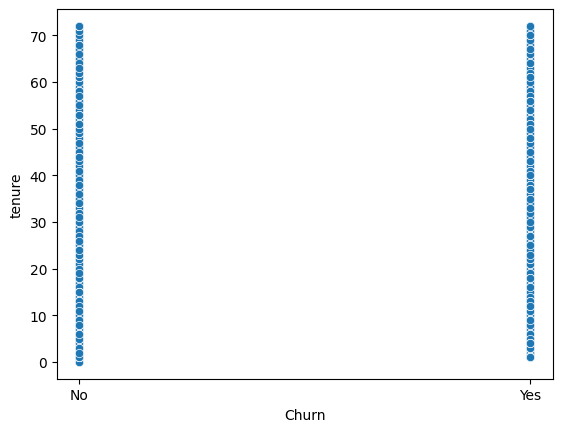

In [14]:
# tenure vs Churn
sns.scatterplot(x='Churn', y='tenure', data=df)

### (3) Multivariate Analysis

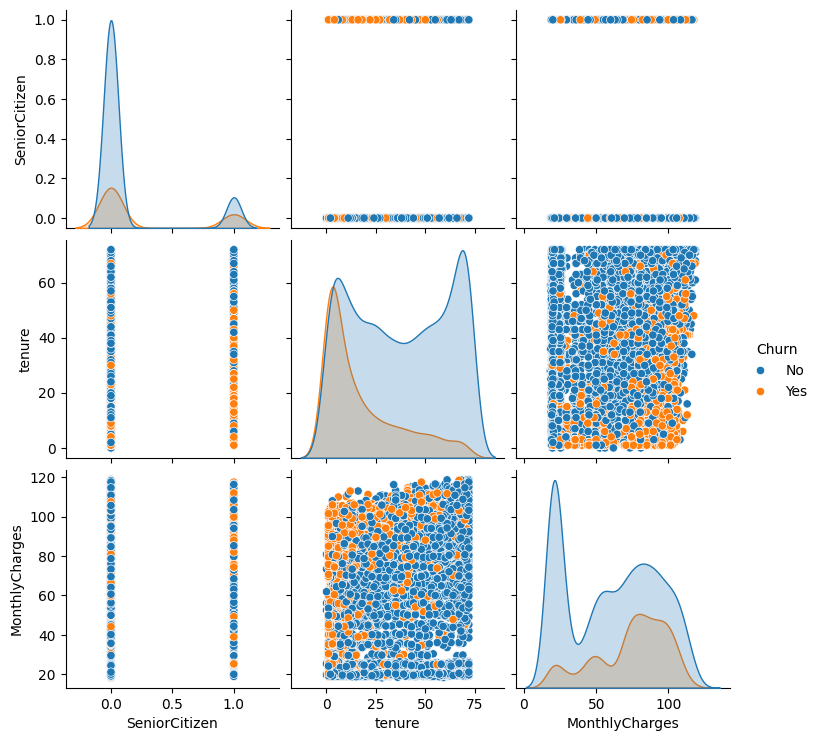

In [15]:
sns.pairplot(data=df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']], hue='Churn')

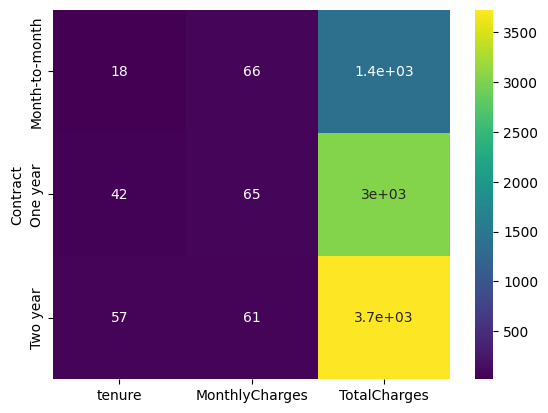

In [16]:
# Converts the numeric Any value that cannot be converted becomes NaN.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

sns.heatmap(
    df.groupby("Contract")[["tenure","MonthlyCharges","TotalCharges"]].mean(),
    annot=True, cmap="viridis"
)
plt.show()

# **Handling Missing Data and Outliers**

---



In [17]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [18]:
# Replaces missing values (NaN) with the median of the column
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df["TotalCharges"].isna().sum()

np.int64(0)

In [19]:
# chack columns values
features = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in features:
    print(col, df[col].unique())
    print("-"*50)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
---------------------------------------

# **Spread of Data**

---



In [20]:
from scipy.stats import skew, kurtosis

df[numerical_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: xlabel='tenure', ylabel='Density'>

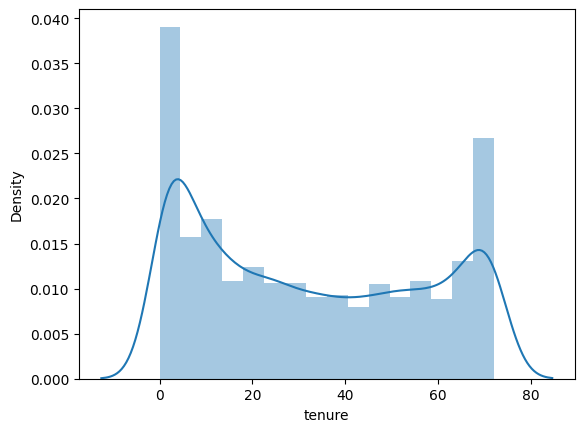

In [21]:
sns.distplot(df['tenure'], kde=True)

<Axes: ylabel='Density'>

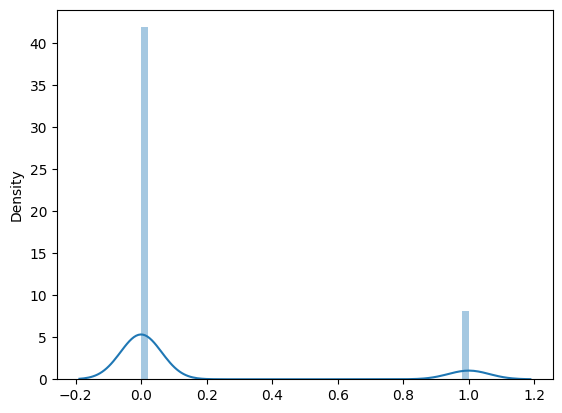

In [22]:
sns.distplot(x=df['SeniorCitizen'], kde=True)

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

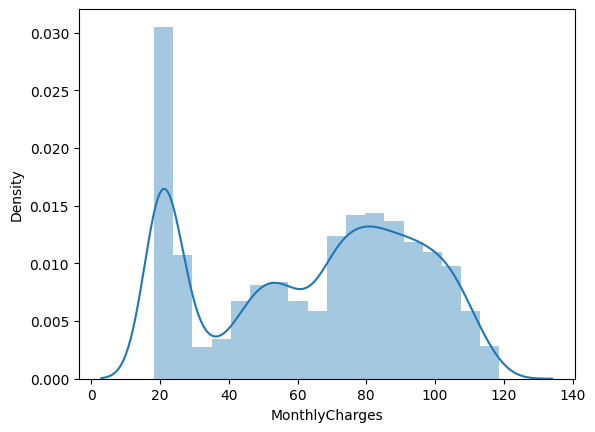

In [23]:
sns.distplot(df['MonthlyCharges'], kde=True)

In [24]:
# Calculate Skewness and Kurtosis
for col in numerical_cols:
    print("\n")
    print(col)
    print("Skewness:", skew(df[col]))
    print("Kurtosis:", kurtosis(df[col]))



SeniorCitizen
Skewness: 1.8332421986079817
Kurtosis: 1.360776958757027


tenure
Skewness: 0.2394887299846216
Kurtosis: -1.3872386910324277


MonthlyCharges
Skewness: -0.2204774644391769
Kurtosis: -1.2572191009381857


# **Automating EDA using Python**

---



In [25]:
def Eda_summary(data):
    print("INFO")
    print(data.info())

    print("\nDESCRIBE")
    print(data.describe())

    print("\nMISSING VALUES")
    print(data.isnull().sum())

    print("\nCORRELATION")
    print(data.corr(numeric_only=True))

Eda_summary(df)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   obj

# **Regression Analysis (Math View)**

---



In [26]:
# Analyze Covariance
df[['SeniorCitizen', 'tenure', 'MonthlyCharges']].cov()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,0.135875,0.149978,2.442062
tenure,0.149978,603.168108,183.196987
MonthlyCharges,2.442062,183.196987,905.410934


In [27]:
# Analyze Correlation
df[['SeniorCitizen', 'tenure', 'MonthlyCharges']].corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


# **Data perprocessing and cleaning**

---



In [28]:
df.drop("customerID",axis=1,inplace=True)

In [29]:
# Cleaning Categorical Columns for Consistency
# Replacing 'No phone service' -->> NO
# Replacing 'No internet Service' -->> No

df['MultipleLines'].replace('No phone service','No',inplace=True)
df['OnlineSecurity'].replace('No internet service','No',inplace=True)
df['OnlineBackup'].replace('No internet service','No',inplace=True)
df['DeviceProtection'].replace('No internet service','No',inplace=True)
df['TechSupport'].replace('No internet service','No',inplace=True)
df['StreamingTV'].replace('No internet service','No',inplace=True)
df['StreamingMovies'].replace('No internet service','No',inplace=True)

In [30]:
# Converting Yes/No Columns to Binary (0/1)
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [31]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [32]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,False,False,True,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,True,False,True,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,False,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,True,False,False,False,False,False,True


In [33]:
df_encoded = df_encoded.astype(int)
df_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29,29,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56,1889,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53,108,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42,1840,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70,151,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,84,1990,0,0,0,1,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,103,7362,0,1,0,1,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,29,346,0,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,74,306,1,1,0,0,0,0,0,1


# **Supervised Learning – Regression Model**

---




In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [35]:
X = df_encoded.drop("Churn",axis=1)
Y = df_encoded["Churn"]

In [36]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify=Y, test_size=0.3, random_state=42)
print(y_train.value_counts())


Churn
0    3622
1    1308
Name: count, dtype: int64


In [37]:
# smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print(y_train_sm.value_counts())

Churn
0    3622
1    3622
Name: count, dtype: int64


In [38]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

In [74]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight="balanced",random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300,class_weight="balanced",random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced",random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(class_weight="balanced",random_state=42)
}

In [75]:
for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)


===== Logistic Regression =====

Accuracy: 0.7747278750591576

Confusion Matrix:


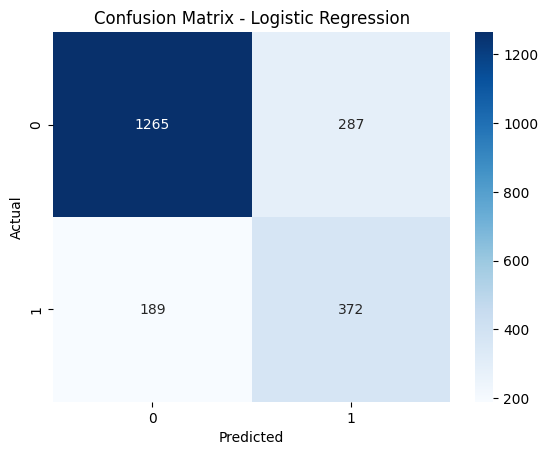


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1552
           1       0.56      0.66      0.61       561

    accuracy                           0.77      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.77      0.78      2113


===== Random Forest =====

Accuracy: 0.77520113582584

Confusion Matrix:


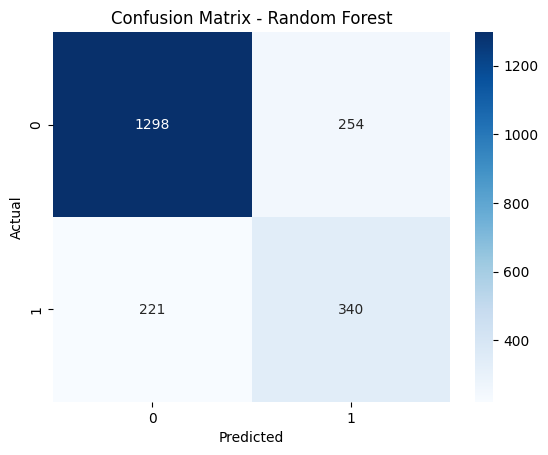


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1552
           1       0.57      0.61      0.59       561

    accuracy                           0.78      2113
   macro avg       0.71      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113


===== Decision Tree =====

Accuracy: 0.7193563653573118

Confusion Matrix:


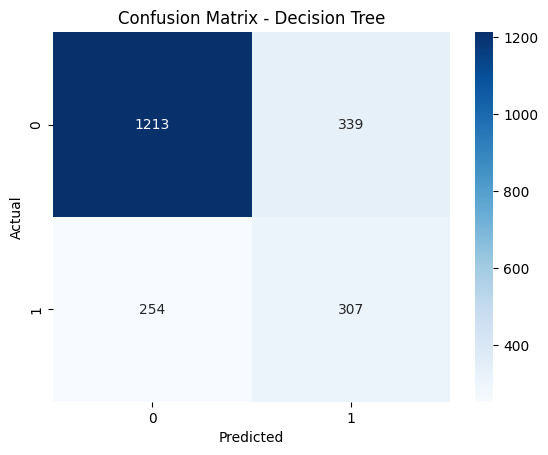


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1552
           1       0.48      0.55      0.51       561

    accuracy                           0.72      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.73      0.72      0.73      2113


===== KNN =====

Accuracy: 0.7363937529578798

Confusion Matrix:


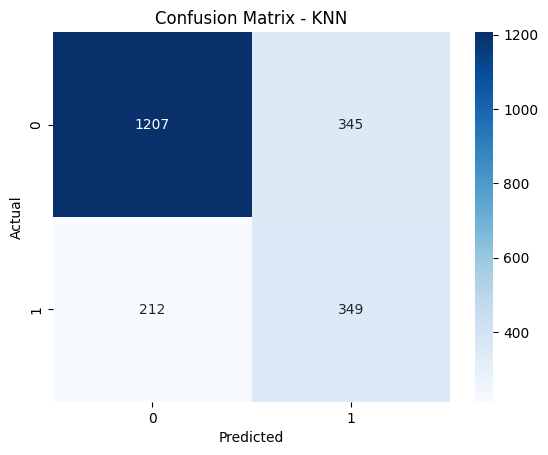


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1552
           1       0.50      0.62      0.56       561

    accuracy                           0.74      2113
   macro avg       0.68      0.70      0.68      2113
weighted avg       0.76      0.74      0.74      2113


===== Naive Bayes =====

Accuracy: 0.751538097491718

Confusion Matrix:


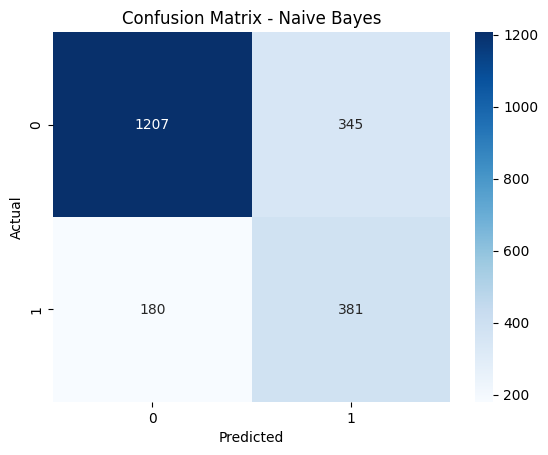


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1552
           1       0.52      0.68      0.59       561

    accuracy                           0.75      2113
   macro avg       0.70      0.73      0.71      2113
weighted avg       0.78      0.75      0.76      2113


===== SVM =====

Accuracy: 0.7733080927591103

Confusion Matrix:


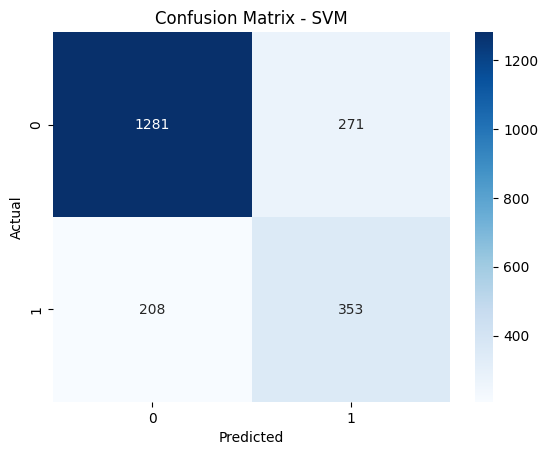


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1552
           1       0.57      0.63      0.60       561

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.78      2113



In [77]:
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Accuracy
    print(f"\n===== {name} =====")
    print("\nAccuracy:", accuracy_score(y_test, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# **Overfitting and Underfitting Analysis**

---




In [42]:
for name, model in models.items():
   train_acc = model.score(X_train_sm, y_train_sm)
   test_acc = model.score(X_test, y_test)
   if train_acc > test_acc:
      print(f"\n===== {name} =====")
      print("Overfitting")
   elif train_acc == test_acc:
      print(f"\n===== {name} =====")
      print("Perfect Fit")
   else:
      print(f"\n===== {name} =====")
      print("Underfitting")


===== Logistic Regression =====
Overfitting

===== Random Forest =====
Overfitting

===== Decision Tree =====
Overfitting

===== KNN =====
Overfitting

===== Naive Bayes =====
Overfitting


# **Model Evaluation**

---



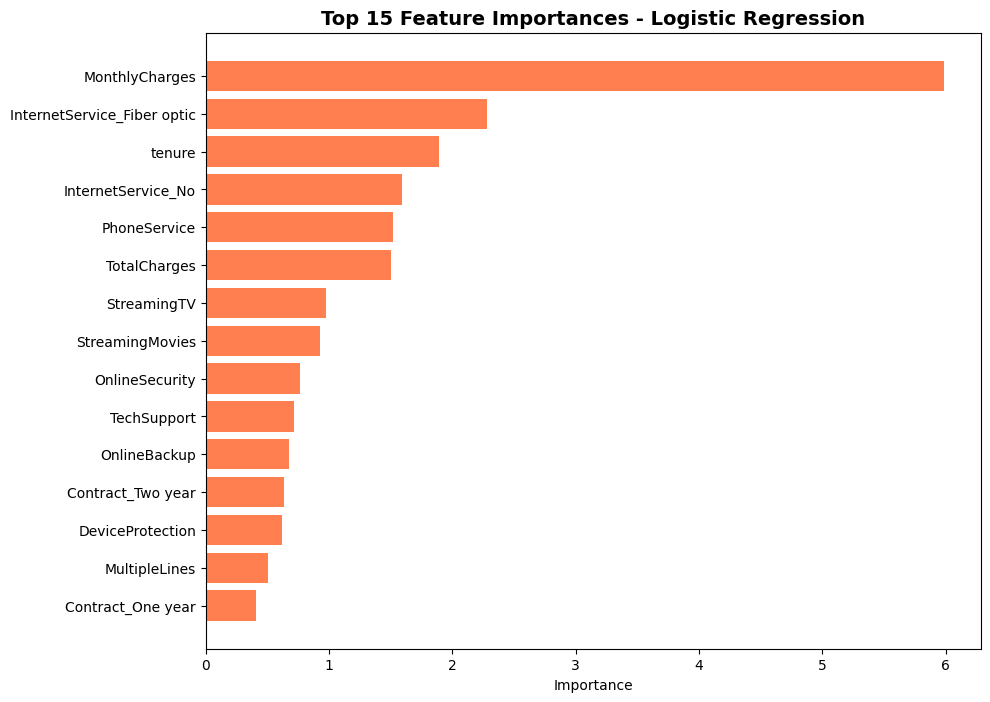

In [89]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(models['Logistic Regression'].coef_[0])
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)

plt.figure(figsize=(10,8))
plt.barh(feature_importance['Feature'][:15],
         feature_importance['Importance'][:15],color='coral')
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances - Logistic Regression',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()

In [90]:
import joblib
joblib.dump(models['Logistic Regression'], 'customer_churn_model.pkl')
joblib.dump(scaler, 'churn_scaler.pkl')
joblib.dump(X.columns.tolist(), 'columns.pkl')

['columns.pkl']